<a href="https://colab.research.google.com/github/Megalonnix/ChallengeAluraStore/blob/master/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [14]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [3]:
# 0. Lista de Faturamento individual por loja:
faturamentos_ = []

# 2. Função para agilizar coleta de faturamentos, dependendo do nome da loja:
def obterFaturamento(n_loja):
  if (n_loja == None):
    return round(sum(loja['Preço']),2)
  else: return round(sum(globals()[f'loja{n_loja}']['Preço']), 2)

# 3. Coleta de cada faturamento individual e armazenamento do mesmo na lista.
def pushFaturamento(n_loja = None):
  faturamento_loja = obterFaturamento(n_loja)
  if len(faturamentos_) < 4:
    faturamentos_.append(faturamento_loja)
  return faturamentos_

In [4]:
pushFaturamento()
pushFaturamento(2)
pushFaturamento(3)
pushFaturamento(4)

print(f'Faturamento Loja 1: R$ {faturamentos_[0]}')
print(f'Faturamento Loja 2: R$ {faturamentos_[1]}')
print(f'Faturamento Loja 3: R$ {faturamentos_[2]}')
print(f'Faturamento Loja 4: R$ {faturamentos_[3]}')

Faturamento Loja 1: R$ 1534509.12
Faturamento Loja 2: R$ 1488459.06
Faturamento Loja 3: R$ 1464025.03
Faturamento Loja 4: R$ 1384497.58


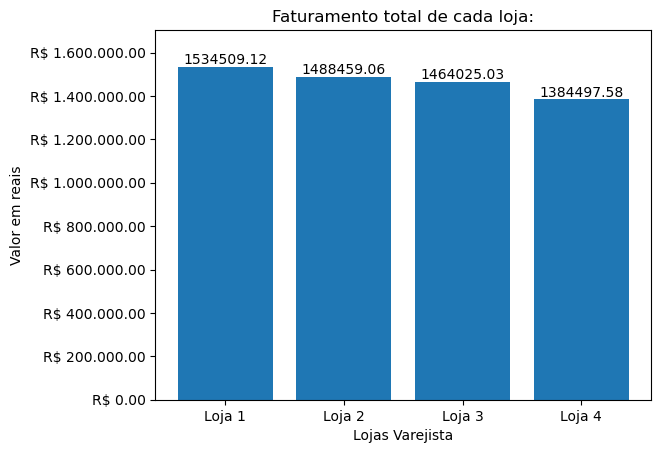

In [5]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Dados Gráfico de Barras:
categorias = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
valores = faturamentos_

# Criando o gráfico de barras
plt.bar(categorias, valores)

# Adicionando título e rótulos
plt.title('Faturamento total de cada loja:')
plt.xlabel('Lojas Varejista')
plt.ylabel('Valor em reais')

# Formatação com ponto como separador
formatoEixoY = ticker\
  .FuncFormatter(
      lambda
      vlEixoY,
      argNaoUtilizado: f'R$ {vlEixoY:,.2f}'.replace(',', '.'))

# ---------------------
# NOTA DE APRENDIZADO:
# ---------------------
# plt.gca()                          => Get Current Axes (Pegou os eixos que eu fiz).
# .yaxis                             => Acessa o eixo Y.
# .set_major_formatter(formatoEixoY) => Define o formato que eu gerei nas linhas ACIMA.

plt.gca()\
   .yaxis\
   .set_major_formatter(formatoEixoY)

# Valores em cima das barras do gráfico:
for i, vlr in enumerate(valores):
  plt.text(
      i,
      vlr,
      f'{round(vlr,2)}',
      ha='center',
      va='bottom',
      fontsize=10)

# Exibindo o gráfico
plt.ylim(0, max(valores) * 1.11) # Ajuste no teto do gráfico
plt.show()


# 2. Vendas por Categoria


In [6]:
# Análise de categorias existentes no dataset (não sei quantas existem) :
categorias_existentes = list(loja['Categoria do Produto'].unique())
qtd_categorias = len(categorias_existentes)

info_categorias = {
  'categorias': categorias_existentes,
  'qtd_categorias': qtd_categorias
}

# Já averiquei, todas as lojas possuem a mesma qtd de categorias:
info_categorias

{'categorias': ['eletronicos',
  'moveis',
  'brinquedos',
  'eletrodomesticos',
  'utilidades domesticas',
  'esporte e lazer',
  'livros',
  'instrumentos musicais'],
 'qtd_categorias': 8}

In [7]:
# Obter um objeto informativo
# c/ quantidade de vendas exatas em cada loja individual:

def getQtdVendasPorCtgNaLoja(numLoja = None):

  tituloObj = 'Vendas por categoria Loja'
  resultado = ['']
  nmloja = ""

  if numLoja == None:
    resultado[0] = tituloObj + ' 1:'
    nmloja = f'loja{""}'
  else:
    resultado[0] = \
    tituloObj + f' {numLoja}:'
    nmloja = f'loja{numLoja}'

  for i in info_categorias['categorias']:
    nm_categoria = i
    vendasPorCategoria = len(
      [ j for j in globals()[nmloja]['Categoria do Produto'] if j == f'{nm_categoria}'])
    resultado.append([f'{nm_categoria}:', vendasPorCategoria])

  return resultado

In [8]:
ctgGlobalVendasPorCategoria = [
  getQtdVendasPorCtgNaLoja(),
  getQtdVendasPorCtgNaLoja(2),
  getQtdVendasPorCtgNaLoja(3),
  getQtdVendasPorCtgNaLoja(4)
]

ctgGlobalVendasPorCategoria

[['Vendas por categoria Loja 1:',
  ['eletronicos:', 448],
  ['moveis:', 465],
  ['brinquedos:', 324],
  ['eletrodomesticos:', 312],
  ['utilidades domesticas:', 171],
  ['esporte e lazer:', 284],
  ['livros:', 173],
  ['instrumentos musicais:', 182]],
 ['Vendas por categoria Loja 2:',
  ['eletronicos:', 422],
  ['moveis:', 442],
  ['brinquedos:', 313],
  ['eletrodomesticos:', 305],
  ['utilidades domesticas:', 181],
  ['esporte e lazer:', 275],
  ['livros:', 197],
  ['instrumentos musicais:', 224]],
 ['Vendas por categoria Loja 3:',
  ['eletronicos:', 451],
  ['moveis:', 499],
  ['brinquedos:', 315],
  ['eletrodomesticos:', 278],
  ['utilidades domesticas:', 177],
  ['esporte e lazer:', 277],
  ['livros:', 185],
  ['instrumentos musicais:', 177]],
 ['Vendas por categoria Loja 4:',
  ['eletronicos:', 451],
  ['moveis:', 480],
  ['brinquedos:', 338],
  ['eletrodomesticos:', 254],
  ['utilidades domesticas:', 201],
  ['esporte e lazer:', 277],
  ['livros:', 187],
  ['instrumentos musicai

In [9]:
# import matplotlib.pyplot as plt

# categorias = ['a','b','c','d','e','f','g']
# valores = [10,20,10,30,90,23,78]

# plt.bar(categorias, valores)

def getCategoriasProds():
  return [categoria for categoria in info_categorias['categorias']]

def extrairQtdVendasLoja(numLoja = None):
  dados_loja = getQtdVendasPorCtgNaLoja(numLoja)
  return [dados_loja[idx][1] for idx in range(len(dados_loja)) if idx > 0]

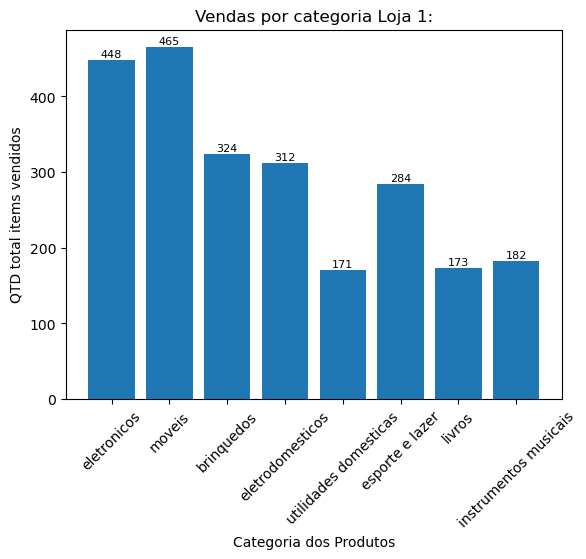

In [10]:
# -------------------------------
# TESTANDO observação individual:
# -------------------------------
# Observação das vendas por categoria (Apenas da Loja 1):

import matplotlib.pylab as plt

categorias = getCategoriasProds()
valores = extrairQtdVendasLoja()

plt.title('Vendas por categoria Loja 1:')
plt.xlabel('Categoria dos Produtos')
plt.ylabel('QTD total items vendidos')
plt.bar(categorias, valores)
plt.xticks(rotation=45)

for i, valor in enumerate(valores):
    plt.text(i,
             valor + 1,
             str(valor),
             ha='center',
             va='bottom',
             fontsize=8)

plt.show()

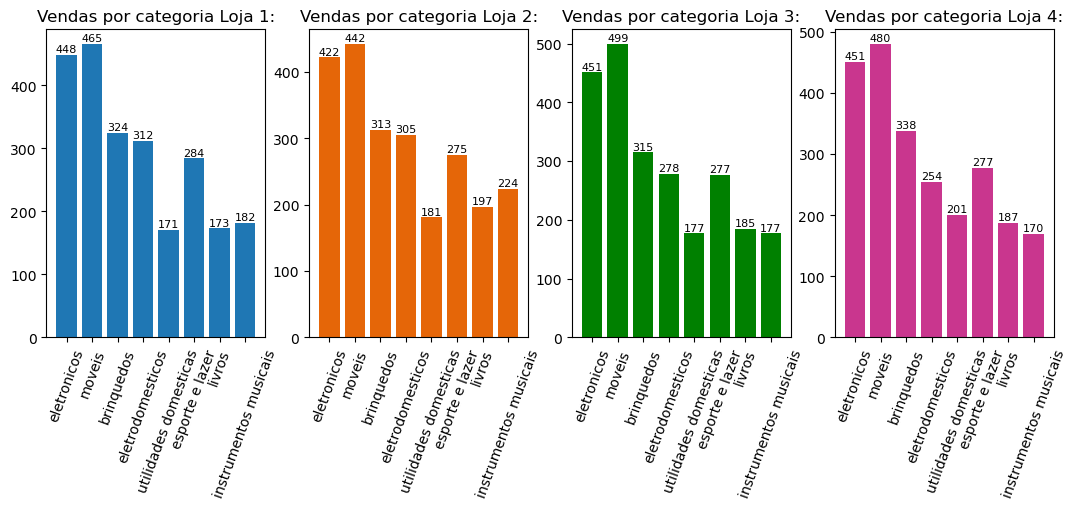

In [11]:
# --------------------------------------------
# Observando vendas por categoria das 4 lojas:
# --------------------------------------------

import matplotlib.pylab as plt


def porValoresNasBarras(vlsDasBarras, colunaGrafico):
  for i, valor in enumerate(vlsDasBarras):
    colunaGrafico.text(
        i,
        valor + 1,
        str(valor),
        ha='center',
        va='bottom',
        fontsize=8)

# Criando figura com 1 linha e 4 colunas (cada subgráfico se chama subplot):
fig, axs = plt.subplots(1,4,figsize=(13,4))

# Gráfico Loja 1:
categorias = getCategoriasProds()
valores = extrairQtdVendasLoja()

axs[0].bar(categorias, valores)
axs[0].set_title('Vendas por categoria Loja 1:')
axs[0].tick_params(axis='x', rotation=70)

# Adicionando valores das vendas em cada barra do sub-gráfico 1:
porValoresNasBarras(valores,axs[0])



# Gráfico Loja 2:
categorias2 = getCategoriasProds()
valores2 = extrairQtdVendasLoja(2)

axs[1].bar(categorias2, valores2, color="#e56608")
axs[1].set_title('Vendas por categoria Loja 2:')
axs[1].tick_params(axis='x', rotation=70)

# Adicionando valores das vendas em cada barra do sub-gráfico 2:
porValoresNasBarras(valores2,axs[1])



# Gráfico Loja 3:
categorias3 = getCategoriasProds()
valores3 = extrairQtdVendasLoja(3)

axs[2].bar(categorias3, valores3, color="green")
axs[2].set_title('Vendas por categoria Loja 3:')
axs[2].tick_params(axis='x', rotation=70)

# Adicionando valores das vendas em cada barra do sub-gráfico 3:
porValoresNasBarras(valores3,axs[2])



# Gráfico Loja 4:
categorias4 = getCategoriasProds()
valores4 = extrairQtdVendasLoja(4)

axs[3].bar(categorias4, valores4, color="#c9368e")
axs[3].set_title('Vendas por categoria Loja 4:')
axs[3].tick_params(axis='x', rotation=70)

# Adicionando valores das vendas em cada barra do sub-gráfico 4:
porValoresNasBarras(valores4,axs[3])

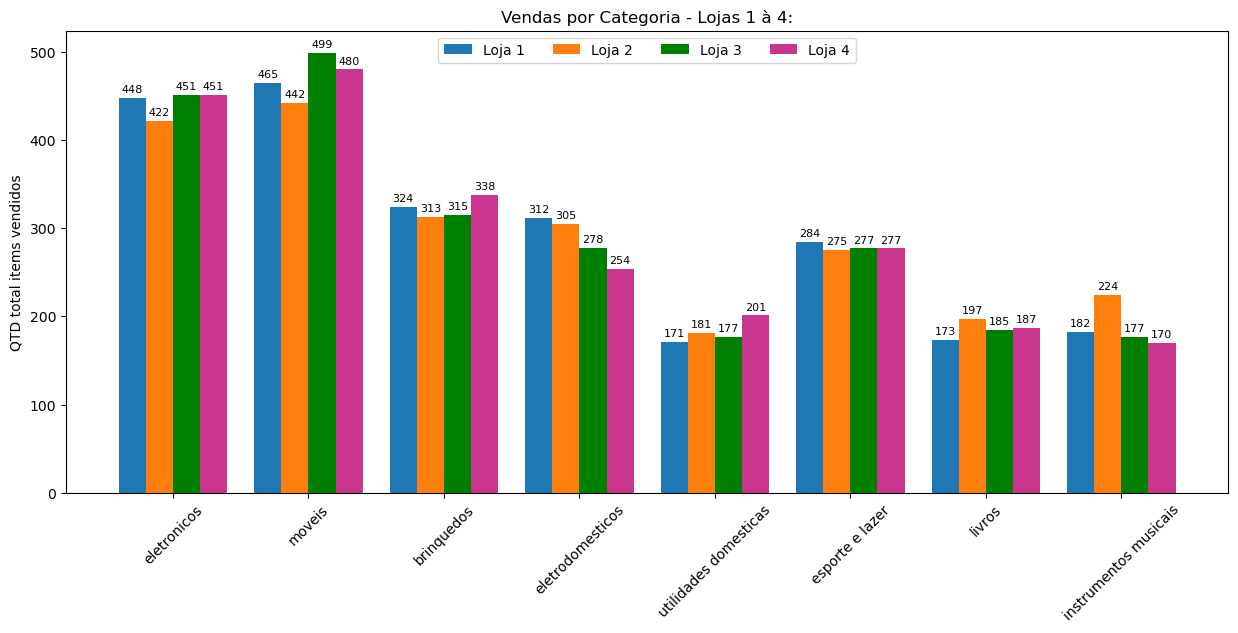

In [12]:
# --------------------------------------------
# Observando vendas por categoria das 4 lojas:
# OBS: Dessa vez, aglutinando categorias
# --------------------------------------------

import matplotlib.pyplot as plt
import numpy as np

# Transferindo informações das vendas das 4 lojas
# para variável com nome mais prático:
_m = ctgGlobalVendasPorCategoria

# Categorias de Produtos:
categorias = getCategoriasProds()

loja1 = [_m[0][1][1], _m[0][2][1], _m[0][3][1], _m[0][4][1], _m[0][5][1], _m[0][6][1], _m[0][7][1], _m[0][8][1]]
loja2 = [_m[1][1][1], _m[1][2][1], _m[1][3][1], _m[1][4][1], _m[1][5][1], _m[1][6][1], _m[1][7][1], _m[1][8][1]]
loja3 = [_m[2][1][1], _m[2][2][1], _m[2][3][1], _m[2][4][1], _m[2][5][1], _m[2][6][1], _m[2][7][1], _m[2][8][1]]
loja4 = [_m[3][1][1], _m[3][2][1], _m[3][3][1], _m[3][4][1], _m[3][5][1], _m[3][6][1], _m[3][7][1], _m[3][8][1]]

# Número Categorias + Posições no Eixo X (Horizontal):
numCategorias = len(categorias)
posicoesEixoX = np.arange(numCategorias)
# Largura Barras:
larguraBarras = 0.20

# Criação das figuras e os eixos do gráfico:
fig, ax = plt.subplots(figsize=(15,6))

# Barras Loja 1:
barra1 = ax.bar(
    posicoesEixoX + (larguraBarras*0),
    loja1, width=larguraBarras,
    label="Loja 1")

# Barras Loja 2:
barra2 = ax.bar(
    posicoesEixoX + (larguraBarras*1),
    loja2, width=larguraBarras,
    label="Loja 2")

# Barras Loja 3:
barra3 = ax.bar(
    posicoesEixoX + (larguraBarras*2),
    loja3, width=larguraBarras,
    label="Loja 3", color="green")

# Barras Loja 4:
barra4 = ax.bar(
    posicoesEixoX + (larguraBarras*3),
    loja4, width=larguraBarras,
    label="Loja 4", color="#c9368e")

# Função para por valoras acima das barras do meu gráfico:
def porValoresAcimaDasBarras(
    listValoresCateg,
    eixoPadrao,
    nivelDesloc):

  for i, vl in enumerate(listValoresCateg):
    eixoPadrao.text(
        i + nivelDesloc,
        vl + 4,
        str(vl),
        ha='center',
        va='bottom',
        fontsize=8
    )

# Utilizando minha função em cada grupo de barras:
porValoresAcimaDasBarras(loja1, ax, (larguraBarras*0))
porValoresAcimaDasBarras(loja2, ax, (larguraBarras*1))
porValoresAcimaDasBarras(loja3, ax, (larguraBarras*2))
porValoresAcimaDasBarras(loja4, ax, (larguraBarras*3))

# 1) Objeto responsável por centralizar rórulos do eixo X +
# 2) Objeto responsá. por etiquetas do eixo X:
obj_centralizacao_barras = ax.set_xticks(posicoesEixoX + larguraBarras*1.5)
obj_etiquetas_categorias = ax.set_xticklabels(
    categorias,
    fontsize=10,
    rotation=45)

# Legendas e Título do Gráfico:
legendaDasCores = ax.legend()
legendaSuperior = ax.set_title("Vendas por Categoria - Lojas 1 à 4:")


ax.set_ylabel('QTD total items vendidos', fontsize=10)
ax.legend(loc='upper center', ncols=4)
plt.show()

# 3. Média de Avaliação das Lojas

In [17]:
# Calculando a média individual de
# avaliação de cada loja:

import numpy as np

# Definir qual loja será lida:
def escolher_loja(numLoja = None):
  if numLoja is not None:
    return globals()[f'loja{numLoja}']
  else: return globals()['loja']

# Obter média de avaliações em cada loja específica:
def getMediaAvlLoja(numLoja = None):
  lojaX = escolher_loja(numLoja)
  mediaAval = 0
  
  if numLoja is not None:
    mediaAval = np.average([ idx for idx in lojaX['Avaliação da compra']])
  else: mediaAval = np.average([ idx for idx in lojaX['Avaliação da compra']])

  return float(mediaAval)

print('Média de Avaliação Loja 1:', round(getMediaAvlLoja(),2))
print('Média de Avaliação Loja 2:', round(getMediaAvlLoja(2),2))
print('Média de Avaliação Loja 3:', round(getMediaAvlLoja(3),2))
print('Média de Avaliação Loja 4:', round(getMediaAvlLoja(4),2))

Média de Avaliação Loja 1: 3.98
Média de Avaliação Loja 2: 4.04
Média de Avaliação Loja 3: 4.05
Média de Avaliação Loja 4: 4.0


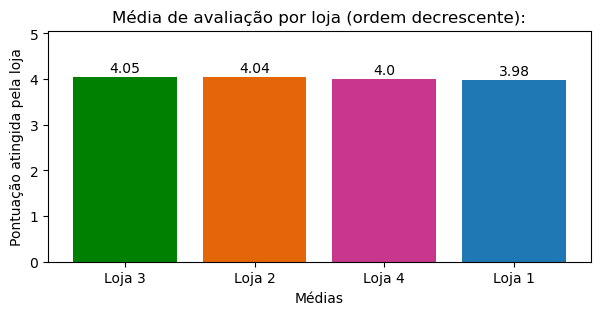

In [ ]:
# Gerando gráfico de médias em ordem decrescente
# conforme os dados obtidos acima:

import matplotlib.pylab as plt

# Dados utilizados:
categorias = [
    'Loja 1',
    'Loja 2',
    'Loja 3',
    'Loja 4'
]

valores = [
    getMediaAvlLoja(),
    getMediaAvlLoja(2),
    getMediaAvlLoja(3),
    getMediaAvlLoja(4)
]

cores_lojas = [
    '#1f77b4',
    '#e56608',
    'green',
    '#c9368e'
]

# Ordenando lojas com maior média:
array_lojas = list(zip(categorias,valores, cores_lojas))

lista_ordenada = sorted(
    array_lojas,
    key=lambda idxArray: idxArray[1],
    reverse=True)

categorias_ordenadas = [lista_ordenada[i][0] for i in range(len(lista_ordenada))]
valores_ordenados = [lista_ordenada[i][1] for i in range(len(lista_ordenada))]
cores_ordenadas = [lista_ordenada[i][2] for i in range(len(lista_ordenada))]

# Montando Gráfico:
plt.figure(figsize=(7,3))
plt.title('Média de avaliação por loja (ordem decrescente):')
plt.bar(
    categorias_ordenadas,
    valores_ordenados, color=cores_ordenadas)

for i, vlr in enumerate(valores_ordenados):
  plt.text(
      i,
      vlr + vlr/100,
      str(round(vlr, 2)),
      ha='center',
      va='bottom',
      fontsize=10)

plt.ylabel('Pontuação atingida pela loja')
plt.xlabel('Médias')
plt.ylim(0, max(valores_ordenados) * 1.25) # Ajustei o limite do meu eixo Y
plt.show()                                 # para acomodar a etiqueta acima das barrinhas.

# 4. Produtos Mais e Menos Vendidos

In [67]:
# Função para obter lista de produtos (+) e (-)
# vendidos de uma loja:

from collections import Counter

def getCincoItemsMaisMenosVendidos(numLoja=None):
    loja = escolher_loja(numLoja)
    count_frquencia_prods = Counter(loja['Produto'])
    cinco_mais_freq = count_frquencia_prods.most_common(5)
    cinco_menos_freq = count_frquencia_prods.most_common()[:-6:-1]
    return {
        'cinco_mais_vendidos': cinco_mais_freq,
        'cinco_menos_vendidos': cinco_menos_freq[::-1],
    }

In [68]:
# Carregando dados para preencher
# Gráfico de Barras abaixo:

def getInfo(numLoja=None,opc='maisV'):
    categ = ""
    if opc == 'maisV' or opc == None: 
        categ = 'cinco_mais_vendidos'
    elif opc == "menosV": 
        categ = 'cinco_menos_vendidos'

    loja_info = getCincoItemsMaisMenosVendidos(numLoja)
    loja_info = loja_info[categ]
    return loja_info

In [69]:

# Número de vendas dos items MENOS e Mais vendidos das lojas:

# Loja 4:
x4 = [getInfo(4,'menosV')[i][-1] for i in range(0,5)]
x4b = [getInfo(4)[i][-1] for i in range(0,5)]
# Loja 3:
x3 = [getInfo(3,'menosV')[i][-1] for i in range(0,5)]
x3b = [getInfo(3)[i][-1] for i in range(0,5)]
# Loja 2:
x2 = [getInfo(2,'menosV')[i][-1] for i in range(0,5)]
x2b = [getInfo(2)[i][-1] for i in range(0,5)]
# Loja 1:
x1 = [getInfo(None,'menosV')[i][-1] for i in range(0,5)]
x1b = [getInfo(None)[i][-1] for i in range(0,5)]

In [70]:
# Nomes dos items MENOS e MAIS vendidos das lojas:

# Loja 4:
x4_ = [getInfo(4,'menosV')[i][0] for i in range(0,5)]
x4b_ = [getInfo(4)[i][0] for i in range(0,5)]
# Loja 3:
x3_ = [getInfo(3,'menosV')[i][0] for i in range(0,5)]
x3b_ = [getInfo(3)[i][0] for i in range(0,5)]
# Loja 2:
x2_ = [getInfo(2,'menosV')[i][0] for i in range(0,5)]
x2b_ = [getInfo(2)[i][0] for i in range(0,5)]
# Loja 1:
x1_ = [getInfo(None,'menosV')[i][0] for i in range(0,5)]
x1b_ = [getInfo(None)[i][0] for i in range(0,5)]

In [71]:
# Gerador de frases para legendas dos segmentos de barras:
def getFrase(arg1,arg2):
    return f'"{arg1}"\nnº vendas: {arg2}'

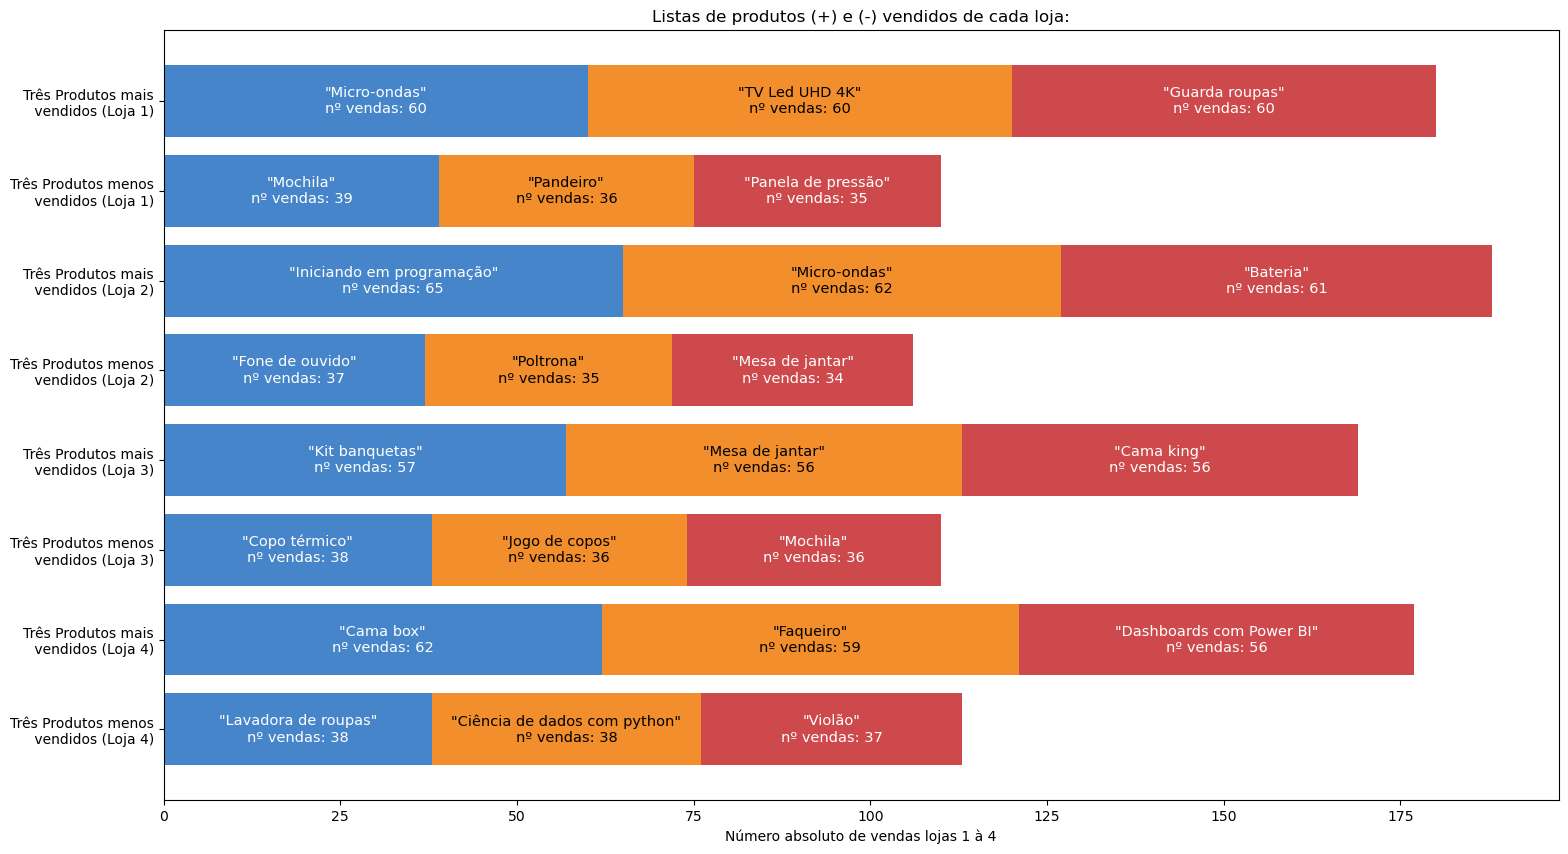

In [73]:
import numpy as np
import matplotlib.pyplot as plt

# Categorias Principais:
categorias = [
    'Três Produtos menos\n vendidos (Loja 4)',
    'Três Produtos mais\n vendidos (Loja 4)',
    'Três Produtos menos\n vendidos (Loja 3)',
    'Três Produtos mais\n vendidos (Loja 3)',
    'Três Produtos menos\n vendidos (Loja 2)',
    'Três Produtos mais\n vendidos (Loja 2)',
    'Três Produtos menos\n vendidos (Loja 1)',
    'Três Produtos mais\n vendidos (Loja 1)'
]

# Dados dos segmentos empilhados para cada grupo
# Cada sub-lista representa um "andar/camada" dos arrays abaixo:

valores_segumento1 = [x4[0],x4b[0],x3[0],x3b[0],x2[0],x2b[0],x1[0],x1b[0]] # segmento azul
valores_segumento2 = [x4[1],x4b[1],x3[1],x3b[1],x2[1],x2b[1],x1[1],x1b[1]] # segmento laranja
valores_segumento3 = [x4[2],x4b[2],x3[2],x3b[2],x2[2],x2b[2],x1[2],x1b[2]] # segmento vermelho

valores_por_segmento = [ 
    valores_segumento1, 
    valores_segumento2, 
    valores_segumento3
]

# Cores que serão usadas em cada segmento
cores_segmentos_barras = [ "#4685c9","#f28e2b", "#ce494b" ]

# Textos os quais ficarão dentro de cada segmento de barra:
txts_num_vendas = np.array([
    [getFrase(x4_[0],x4[0]),getFrase(x4b_[0],x4b[0]),getFrase(x3_[0],x3[0]),getFrase(x3b_[0],x3b[0]),getFrase(x2_[0],x2[0]),getFrase(x2b_[0],x2b[0]),getFrase(x1_[0],x1[0]),getFrase(x1b_[0],x1b[0])],
    [getFrase(x4_[1],x4[1]),getFrase(x4b_[1],x4b[1]),getFrase(x3_[1],x3[1]),getFrase(x3b_[1],x3b[1]),getFrase(x2_[1],x2[1]),getFrase(x2b_[1],x2b[1]),getFrase(x1_[1],x1[1]),getFrase(x1b_[1],x1b[1])],
    [getFrase(x4_[2],x4[2]),getFrase(x4b_[2],x4b[2]),getFrase(x3_[2],x3[2]),getFrase(x3b_[2],x3b[2]),getFrase(x2_[2],x2[2]),getFrase(x2b_[2],x2b[2]),getFrase(x1_[2],x1[2]),getFrase(x1b_[2],x1b[2])]
])

# Índices das posições dos grupos no eixo Y
posicoes_y = np.arange(len(categorias))

# Aparência do meu gráfico de barras horizontais:
figura, ax = plt.subplots(figsize=(18,10))

# Variável responsável pelo início da posição das minhas barras:
inicio_barras = np.zeros(len(categorias))


# A1:
# Criando minhas barras individualmente:
barras_criadas = []

for idx, valor in enumerate(valores_por_segmento):
    nova_barra = ax.barh(
        y=posicoes_y,
        width=valor,
        color=cores_segmentos_barras[idx],
        align='center',
        left=inicio_barras
    )
    inicio_barras += valor
    barras_criadas.append(nova_barra)

# A2:
# Adicionando os textos de PORCENTAGEM no centro de cada segmento
# das minhas barras:

for indice_segmento, grupo_de_barras in enumerate(barras_criadas):
    for indice_grupo, barra in enumerate(grupo_de_barras):
        
        centro_x = barra.get_x() + barra.get_width() / 2
        centro_y = barra.get_y() + barra.get_height() / 2
        texto = txts_num_vendas[indice_segmento][indice_grupo]

        corTxt = ""

        if indice_segmento % 2 == 0:
            corTxt = "#fff"
        else:
            corTxt = "#000"

        ax.text(
            x=centro_x,
            y=centro_y,
            s=f'{texto}',
            ha="center", va="center", 
            fontsize=10.5,
            color=corTxt)
        
# Ajustes na aparência do gráfico:
ax.set_yticks(posicoes_y)
ax.set_yticklabels(categorias)
ax.set_xlabel('Número absoluto de vendas lojas 1 à 4')
ax.set_title('Listas de produtos (+) e (-) vendidos de cada loja:')

plt.show()

# 5. Frete Médio por Loja
